In [142]:
"""
In this project, a movie dataset is downloaded from kaggle, first the dataset is cleansed 
and numeric data correlations are identified and mapped 

"""

# Import librariess

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib

import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #Adjust the configuration of the plots we will create

# STEP 1: Read the dataset from 'movies.csv' file using pandas.read_csv() method. 
# The method retuns an pandas DataFrame with all the values read from csv.

df = pd.read_csv("movies.csv")

In [143]:
# Display the TOP 5 row data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [144]:
# STEP 2: DATA CLEANING - Check for any missing data (or null or empty data) in each column and calculate the mean of the empty values. 
# In case a column is completely empty then the result will be 1.0% and that column can be ignored in the further processes.
# Mean values are calculated using numpy.mean() method

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

name - 0.0%
rating - 0.009986859395532195%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.00039421813403416555%
votes - 0.00039421813403416555%
director - 0.0%
writer - 0.00026281208935611036%
star - 0.00013140604467805518%
country - 0.00013140604467805518%
budget - 0.27963206307490146%
gross - 0.02352168199737188%
company - 0.0019710906701708277%
runtime - 0.00026281208935611036%


In [145]:
# STEP 3: DATA CLEANING - Since the dataset is quite big (there are 7669 rows), I am not considering rows with any Null values. 
# Hence, removing the rows with Null values using Pandas dropna() method.

df = df.dropna()

In [146]:
# Find data types for all columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [147]:
# STEP 3: DATA CLEANING - Some of the values in column 'Year' is not matching with values 'Released' column. 
# Creating a new column 'CorrectYear' with values parsed from 'Released'. 
# The 'CorrectYear' values with have 100% match with 'Released' values

df['correctyear'] = df['released'].astype('str').str.split().str[2]

# The new 'CorrectYear' column will be created with object type, change the type to int
df['correctyear'] = df['correctyear'].astype('Int64')

# Drop the incorrect 'Year' column

df = df.drop(columns=['year'])

df.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctyear
0,The Shining,R,Drama,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980


In [149]:
# Display all data types after including 'CorrectYear' and dropping the existing 'Year' column

df.dtypes

name            object
rating          object
genre           object
released        object
score          float64
votes          float64
director        object
writer          object
star            object
country         object
budget         float64
gross          float64
company         object
runtime        float64
correctyear      Int64
dtype: object

In [152]:
# STEP 4: Sort column 'budget' in descending using pandas.sort_values() function

df = df.sort_values(by=['budget'], inplace=False, ascending=False)

In [165]:
# Display all the data

#pd.set_option('display.max_rows', None)

#df

In [171]:
# STEP 5: DATA CLEANING - Drop any duplicates in the 'Company' column

df['company'].drop_duplicates().sort_values(ascending=False).head()

# df.drop_duplicates() # to drop duplicates in the entire dataset

7071        thefyzz
5611    micro_scope
3955       i5 Films
6735     i am OTHER
6362           erbp
Name: company, dtype: object

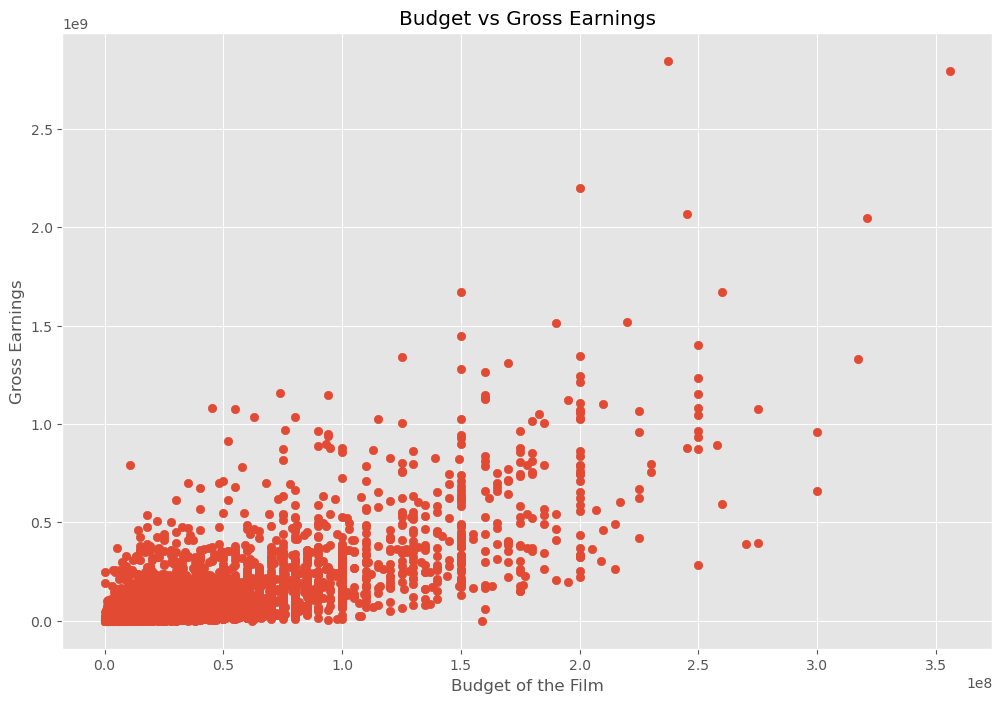

In [156]:
# STEP 6: CORRELATION - Scatter plot for Budget vs Gross

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget of the Film')
plt.ylabel('Gross Earnings')

plt.show()

In [157]:
df.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctyear
7387,Avengers: Endgame,PG-13,Action,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0,2019
7186,Avengers: Infinity War,PG-13,Action,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0,2018
7017,Star Wars: Episode VIII - The Last Jedi,PG-13,Action,"December 15, 2017 (United States)",7.0,581000.0,Rian Johnson,Rian Johnson,Daisy Ridley,United States,317000000.0,1.332699e+09,Walt Disney Pictures,152.0,2017
5007,Pirates of the Caribbean: at World's End,PG-13,Action,"May 25, 2007 (United States)",7.1,608000.0,Gore Verbinski,Ted Elliott,Johnny Depp,United States,300000000.0,9.609965e+08,Walt Disney Pictures,169.0,2007
7008,Justice League,PG-13,Action,"November 17, 2017 (United States)",6.1,418000.0,Zack Snyder,Jerry Siegel,Ben Affleck,United States,300000000.0,6.579270e+08,Warner Bros.,120.0,2017


<Axes: xlabel='budget', ylabel='gross'>

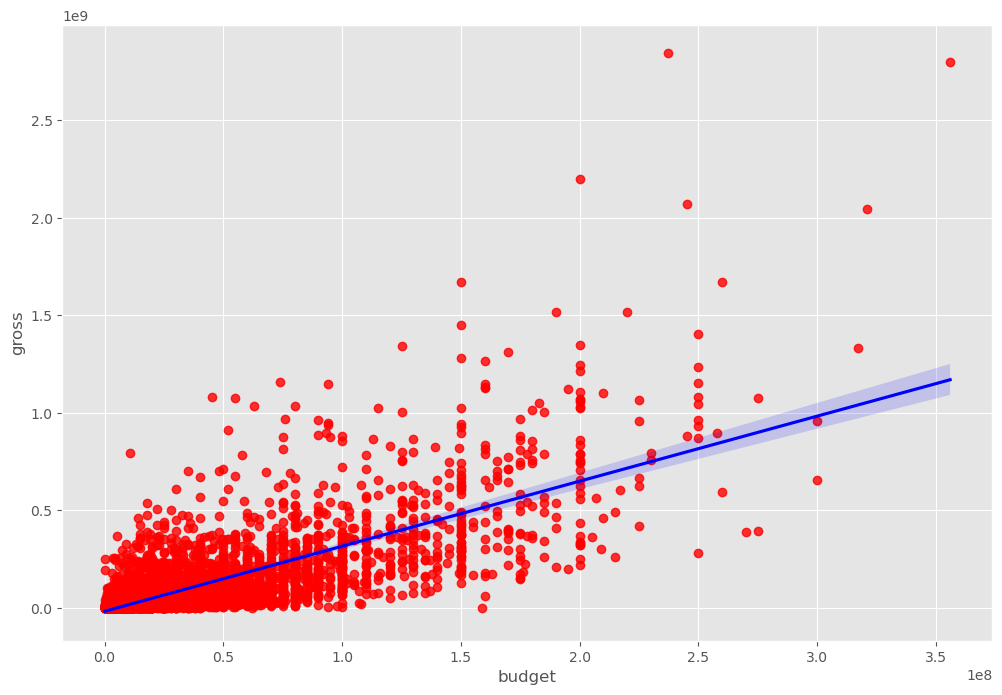

In [158]:
# STEP 7: CORRELATION - Display seaborn plot for Budget vs Gross

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"red"},line_kws={"color":"blue"})

In [159]:
# STEP 8: CORRELATION - Display correlation for numeric values in a matrix structure

df.corr(numeric_only=True, method='pearson') # pearson, kendall, spearman

,score,votes,budget,gross,runtime,correctyear
score,1.000000,0.474450,0.071408,0.222397,0.414527,0.061177
votes,0.474450,1.000000,0.439130,0.614457,0.352202,0.202344
budget,0.071408,0.439130,1.000000,0.740044,0.318266,0.319827
gross,0.222397,0.614457,0.740044,1.000000,0.275591,0.268233
runtime,0.414527,0.352202,0.318266,0.275591,1.000000,0.075053
correctyear,0.061177,0.202344,0.319827,0.268233,0.075053,1.000000


In [ ]:
# High correlation between gross and budget
# High correlation between gross and votes

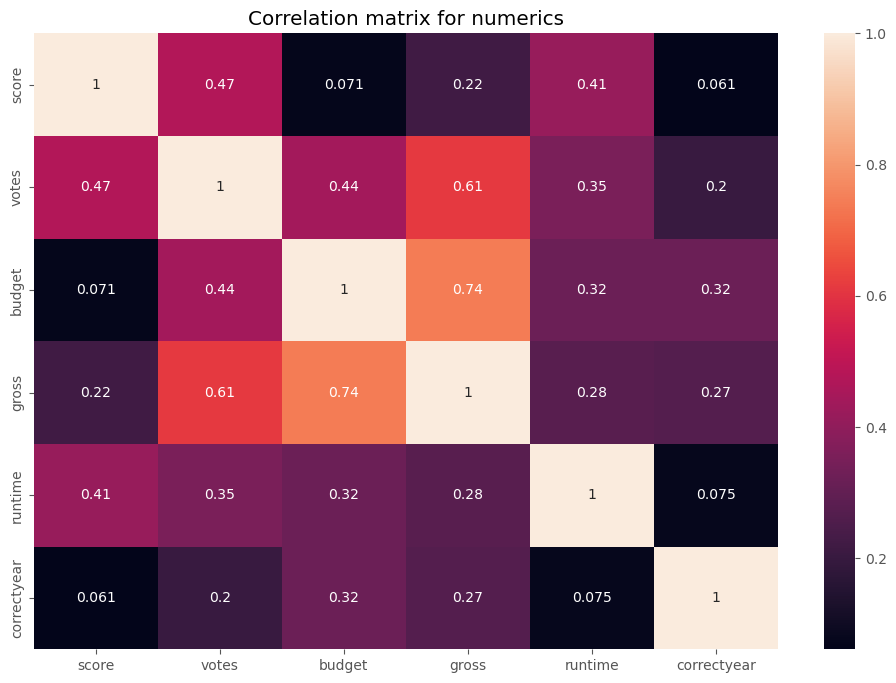

In [160]:
# STEP 9: CORRELATION - Displaying correlation for numeric values in a matrix view

correlation_matrix = df.corr(numeric_only=True, method='pearson')
sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation matrix for numerics')

plt.show()

In [166]:
# STEP 10: Calculate numeric values for all columns with non-numeric values

df_numerized = df.copy()

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctyear
7387,388,5,0,132,8.4,903000.0,105,511,1464,47,356000000.0,2.797501e+09,979,181.0,2019
7186,389,5,0,140,8.4,897000.0,105,511,1464,47,321000000.0,2.048360e+09,979,149.0,2018
7017,3634,5,0,494,7.0,581000.0,1586,2484,355,47,317000000.0,1.332699e+09,1418,152.0,2017
5007,2977,5,0,1834,7.1,608000.0,672,2924,885,47,300000000.0,9.609965e+08,1418,169.0,2007
7008,2117,5,0,1986,6.1,418000.0,2053,1400,139,47,300000000.0,6.579270e+08,1421,120.0,2017


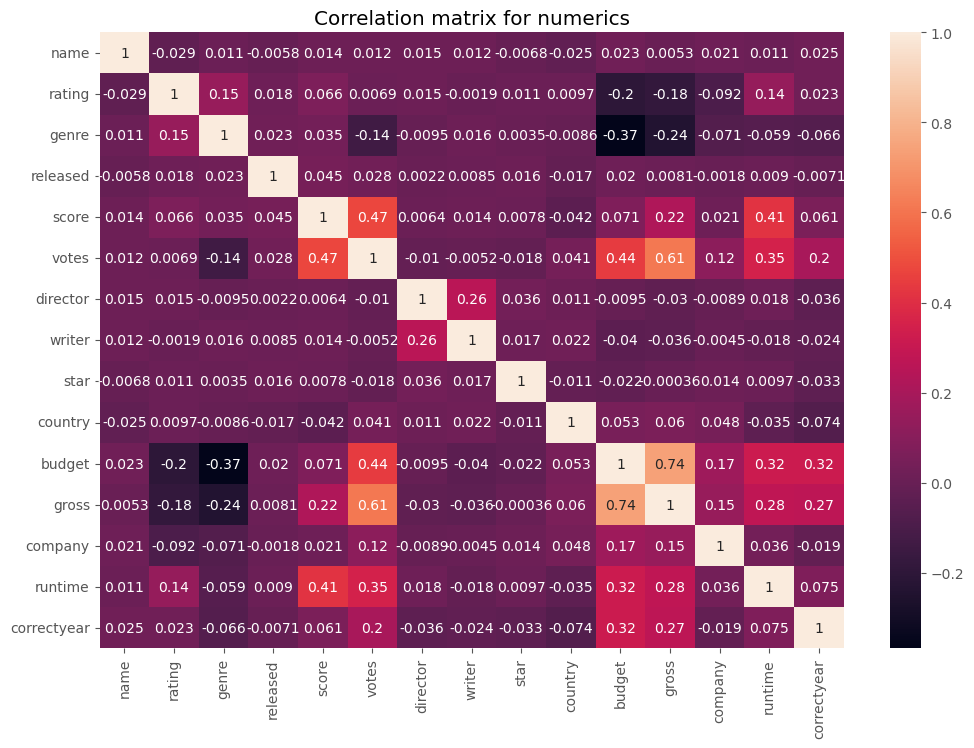

In [163]:
# STEP 11: CORRELATION - Displaying correlation for all numeric values in a matrix view

correlation_matrix = df_numerized.corr(numeric_only=True, method='pearson')
sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation matrix for numerics')

plt.show()

In [167]:
df_numerized.corr().head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctyear
name,1.000000,-0.029206,0.010840,-0.005846,0.013644,0.012261,0.014693,0.012449,-0.006848,-0.025191,0.022948,0.005274,0.021205,0.011080,0.025472
rating,-0.029206,1.000000,0.148032,0.018206,0.066160,0.006901,0.014806,-0.001855,0.010914,0.009745,-0.203096,-0.181428,-0.091575,0.142232,0.022723
genre,0.010840,0.148032,1.000000,0.023395,0.035311,-0.135086,-0.009526,0.016238,0.003476,-0.008552,-0.368329,-0.243621,-0.071253,-0.059070,-0.066329
released,-0.005846,0.018206,0.023395,1.000000,0.045232,0.028356,0.002213,0.008543,0.015698,-0.016599,0.019571,0.008125,-0.001824,0.009042,-0.007114
score,0.013644,0.066160,0.035311,0.045232,1.000000,0.474450,0.006354,0.014291,0.007780,-0.042063,0.071408,0.222397,0.020616,0.414527,0.061177


In [168]:
# STEP 12: CORRELATION - Correlate numerics pairs for values > 0.4 after sorting

correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs.head()

name  name        1.000000
      rating     -0.029206
      genre       0.010840
      released   -0.005846
      score       0.013644
dtype: float64

In [169]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs.head()

budget  genre    -0.368329
genre   budget   -0.368329
        gross    -0.243621
gross   genre    -0.243621
budget  rating   -0.203096
dtype: float64

In [170]:
high_corr = sorted_pairs[(sorted_pairs) > 0.4]
                         
high_corr.head()

score    runtime    0.414527
runtime  score      0.414527
budget   votes      0.439130
votes    budget     0.439130
         score      0.474450
dtype: float64